# Harmonic Generation in 1D

In [1]:
import os
import sys
sys.path.append('..')

In [2]:
import numpy as np
from numpy.fft import fft  # Fourier trafo
import matplotlib.pyplot as plt

import get_field_data as gfd

### Note on the Data

Two colliding 1D Gaussian waves, a probe pulse and a background pump, with
- wavelengths of $1\mu m$ and $5\mu m$,
- amplitudes of $0.1E_{cr}$ and $0.5E_{cr}$, polarized in z-direction,
- widths of $5\mu m$ and $15\mu m$.

The simulation line has a physical length of $300\mu m$ and is divided into 12000 lattice points.  
First, 4- and 6-photon processes are simulated on top of the linear vacuum.

### Get the Data

In [9]:
# Data directory
#scratch_dir = "/project/th-scratch/a/And.Lindner/hewes_examples_sims/1d_hh_gen"
scratch_dir="/Users/andi/Documents/SimResults/1d_hh_gen"
# Data folder
folder = "1d_hh_gen_full_12k"

Define the parameters for passing to the `get_field_data` function.

In [10]:
# Specifications of the simulation parameters
path = os.path.join(scratch_dir, folder)  # path to data
component = 2  # Ez component
steps = [50, 100]  # Output steps
n_prc = 4  # Number of MPI processes

Read-in the data with the convenience function

In [11]:
ez = gfd.combine_steps(gfd.get_field1D, path, component, n_prc, steps=steps)

### Check it out

In [12]:
len(ez[0])

12000

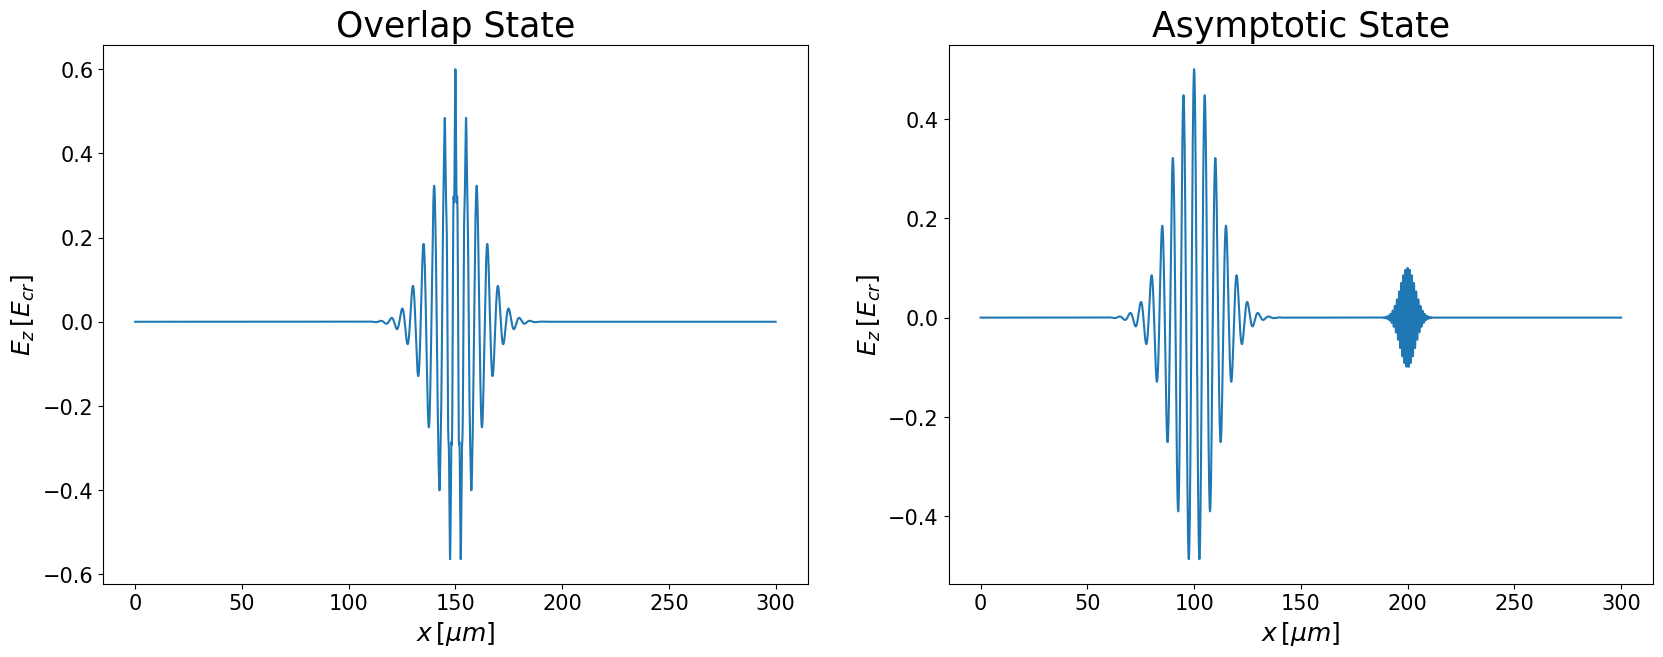

In [13]:
plt.figure(figsize=(20, 7))
for i in range(2):
    plt.subplot(1, 2, i+1)
    if(i == 0):
        plt.title("Overlap State", fontsize=25)
    if(i == 1):
        plt.title("Asymptotic State", fontsize=25)
        
    plt.plot(ez[i])
    plt.xlabel("$x \, [\mu m]$", size=18)
    plt.ylabel("$E_z \, [E_{cr}]$", size=18)
    pos_xs = np.linspace(0, 12000, 7)
    pos_labels = np.arange(0, 350, 50)
    plt.xticks(pos_xs, pos_labels, size=15)
    plt.yticks(size = 15)
    
plt.show()

# Check out the Harmonics in Frequency Space

In frequency space, after the Fourier transformation, the frequencies of the pulses are located at $\omega_p=300\mu m/1\mu m=300$ and $\omega_b=300\mu m/5\mu m=60$.

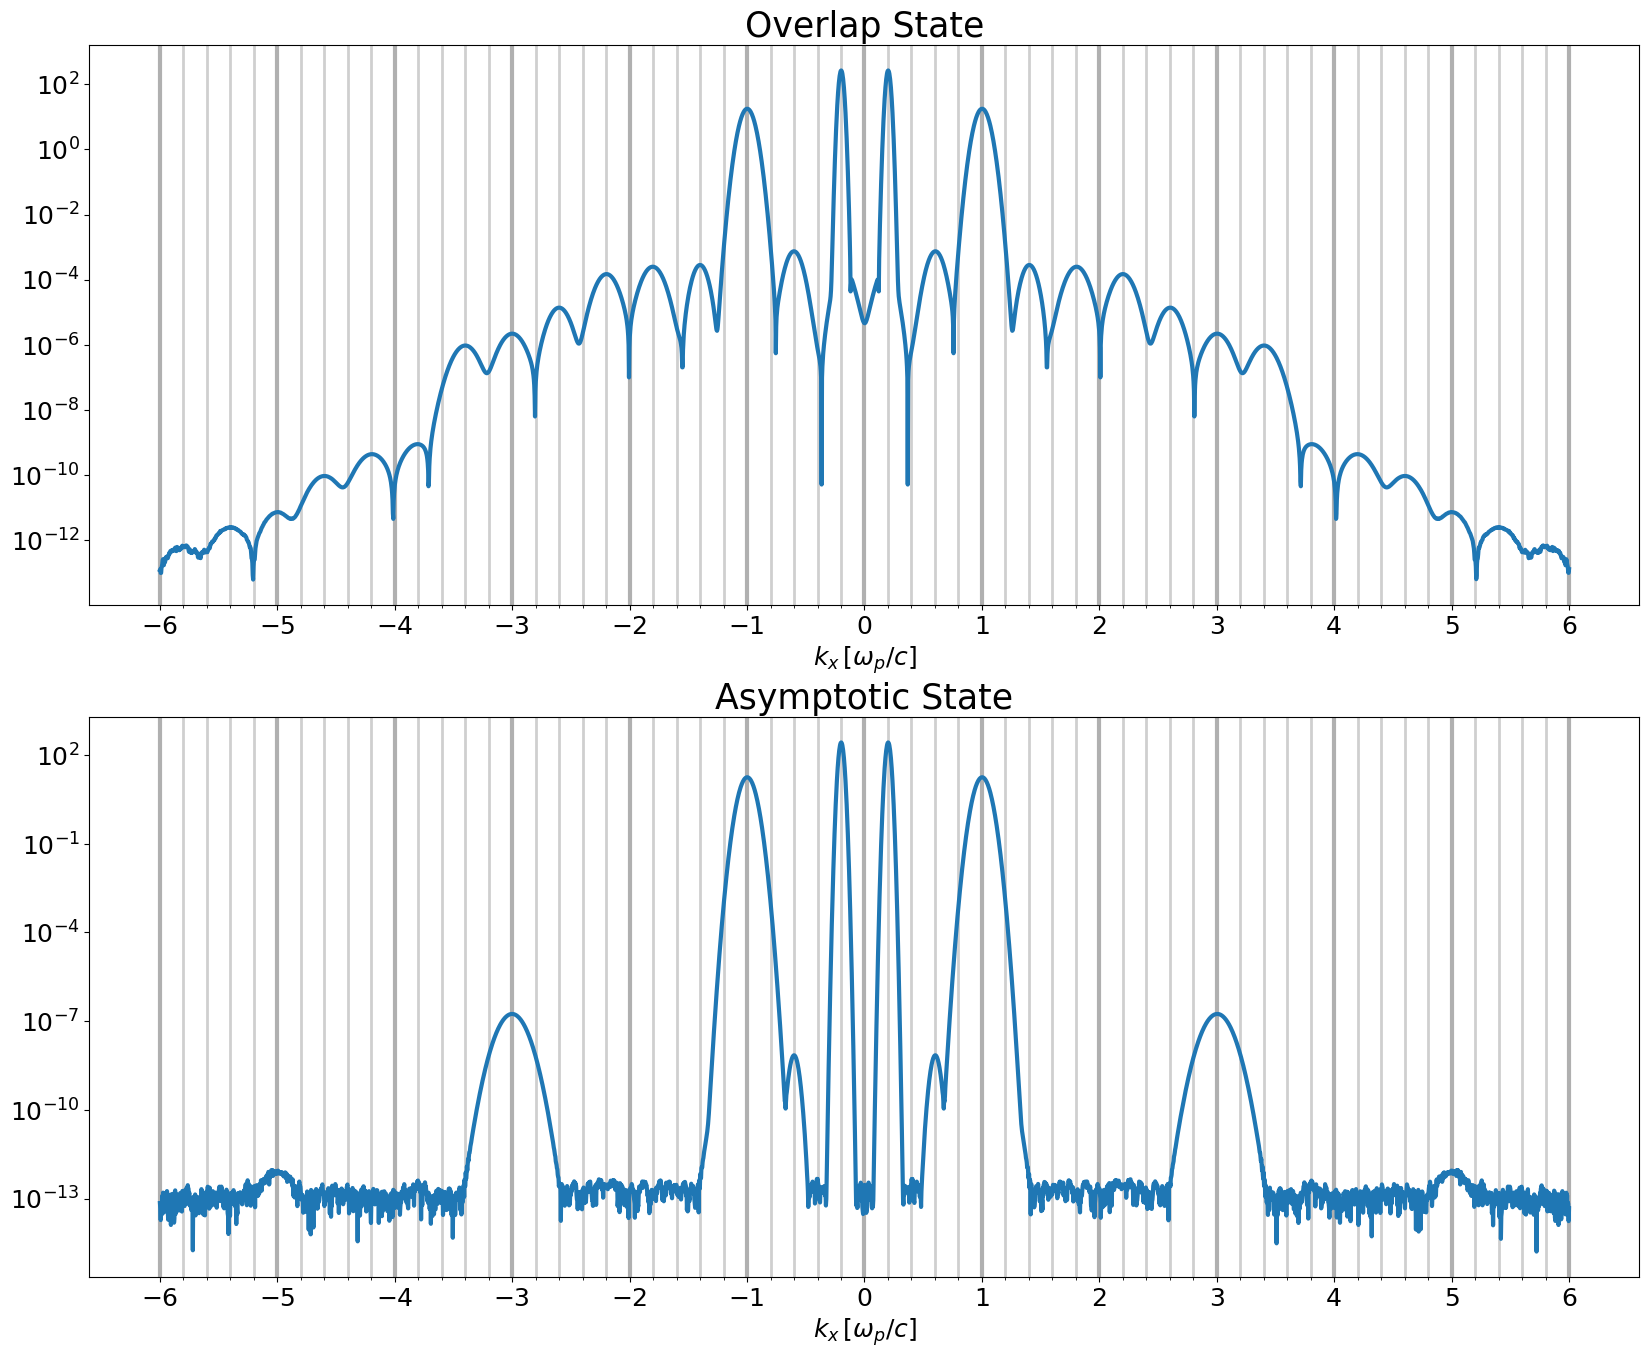

In [24]:
fft_states = []

fig = plt.figure(figsize=(20, 16))

for i in range(2):
    fft_states.append(fft(ez[i]))
    fft_states[i] = np.roll(fft_states[i], int(len(ez[i])/2))  # Center the harmonics
    fft_states[i] = np.abs(fft_states[i])
    
    ax = fig.add_subplot(2, 1, i+1)
    if(i == 0):
        ax.set_title("Overlap State", fontsize=25)
    if(i == 1):
        ax.set_title("Asymptotic State", fontsize=25)
        
    xs = np.linspace(-6, 6, 3600)  # 6*300=1800 -> up to sixth probe harmonic
    ax.plot(xs, fft_states[i][4200:7800], lw=3)
    
    xticks = np.linspace(-6, 6, 13)
    minor_xticks = np.linspace(-6, 6, 61)

    ax.set_xticks(xticks)
    ax.set_xticks(minor_xticks, minor=True)

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='x', which='minor', labelsize=12)

    ax.grid(axis="x", which='minor', linewidth = 2, alpha=0.6)
    ax.grid(axis="x", which='major', linewidth = 3)

    ax.set_yticks([])
    ax.set_yscale("log")
    
    ax.set_xlabel("$k_x \, [\omega_p/c]$", size=18)

plt.show()

Thick vertical lines count the harmonics of the probe pulse in frequency space; thin lines, those of the pump pulse.  
Many arising harmonics can be observed.
Most of them are shortlived due to energy conservation and vanish in the asymptotic state.  
To better see the nonlinear effects and _higher_ harmonics, the linear vacuum is subtracted from the plot.

In [16]:
# Same settings but linear vacuum
folder = "1d_hh_gen_lin_12k"
path = os.path.join(scratch_dir, folder)
ez_lin = gfd.combine_steps(gfd.get_field1D, path, component, n_prc, steps=steps)

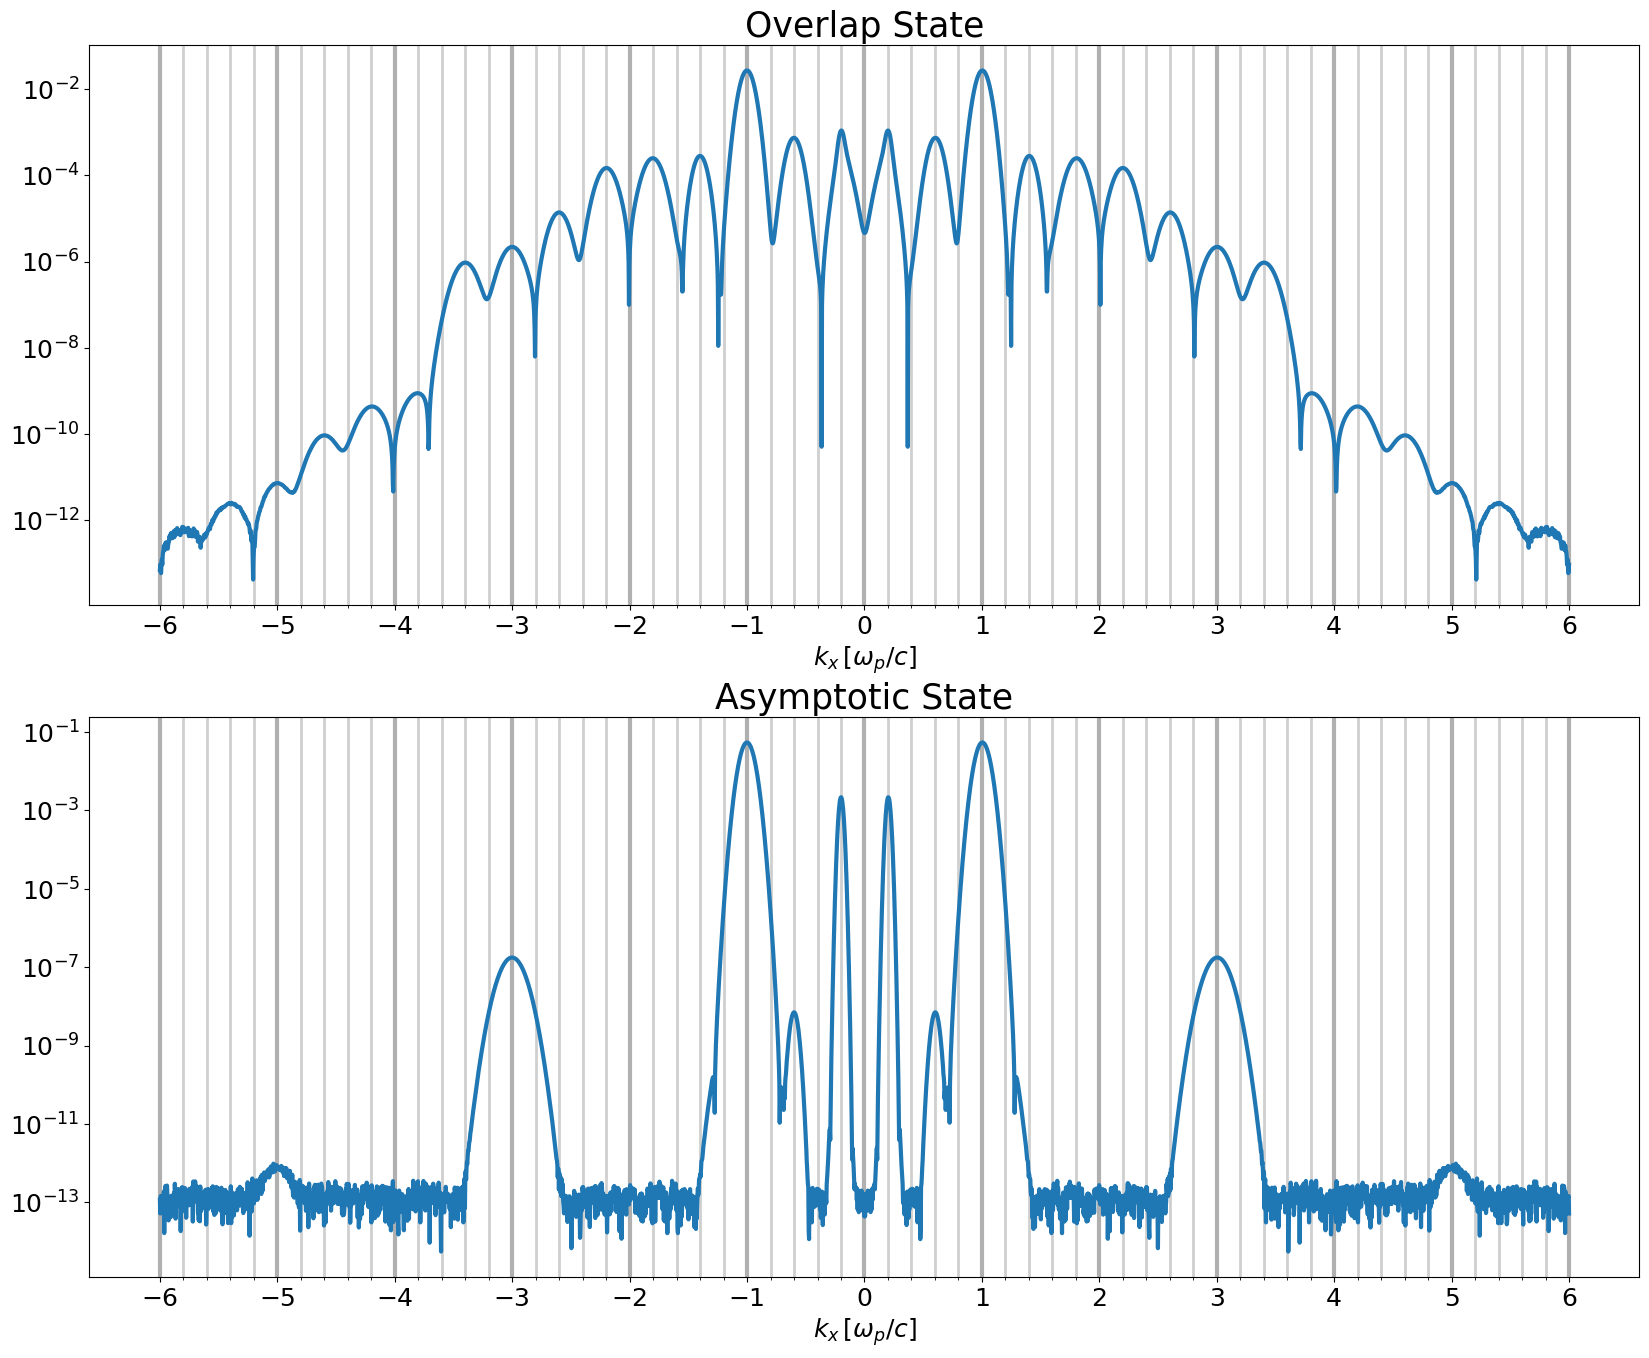

In [23]:
fft_states_nonlin = []

fig = plt.figure(figsize=(20, 16))

for i in range(2):
    fft_states_nonlin.append(fft(np.subtract(ez[i], ez_lin[i])))
    fft_states_nonlin[i] = np.roll(fft_states_nonlin[i], int(len(ez[i])/2))
    fft_states_nonlin[i] = np.abs(fft_states_nonlin[i])
    
    ax = fig.add_subplot(2, 1, i+1)
    if(i == 0):
        ax.set_title("Overlap State", fontsize=25)
    if(i == 1):
        ax.set_title("Asymptotic State", fontsize=25)
        
    xs = np.linspace(-6, 6, 3600)
    ax.plot(xs, fft_states_nonlin[i][4200:7800], lw=3)
    
    xticks = np.linspace(-6, 6, 13)
    minor_xticks = np.linspace(-6, 6, 61)

    ax.set_xticks(xticks)
    ax.set_xticks(minor_xticks, minor=True)

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='x', which='minor', labelsize=12)

    ax.grid(axis="x", which='minor', linewidth = 2, alpha=0.6)
    ax.grid(axis="x", which='major', linewidth = 3)

    ax.set_yticks([])
    ax.set_yscale("log")
    ax.set_xlabel("$k_x \, [\omega_p/c]$", size=18)
    
plt.show()

Ultimately, the contributions of 4-photon and 6-photon processes to the above harmonics can be singled out by dedicated simulations.

In [18]:
# Same settings but onyl 4-photon and only 6-photon processes on top of the linear vacuum
folder4 = "1d_hh_gen_4_12k"
folder6 = "1d_hh_gen_6_12k"

path = os.path.join(scratch_dir, folder4)
ez_only4 = gfd.combine_steps(gfd.get_field1D, path, component, n_prc, steps=steps)

path = os.path.join(scratch_dir, folder6)
ez_only6 = gfd.combine_steps(gfd.get_field1D, path, component, n_prc, steps=steps)

Put them directly into the above plots.

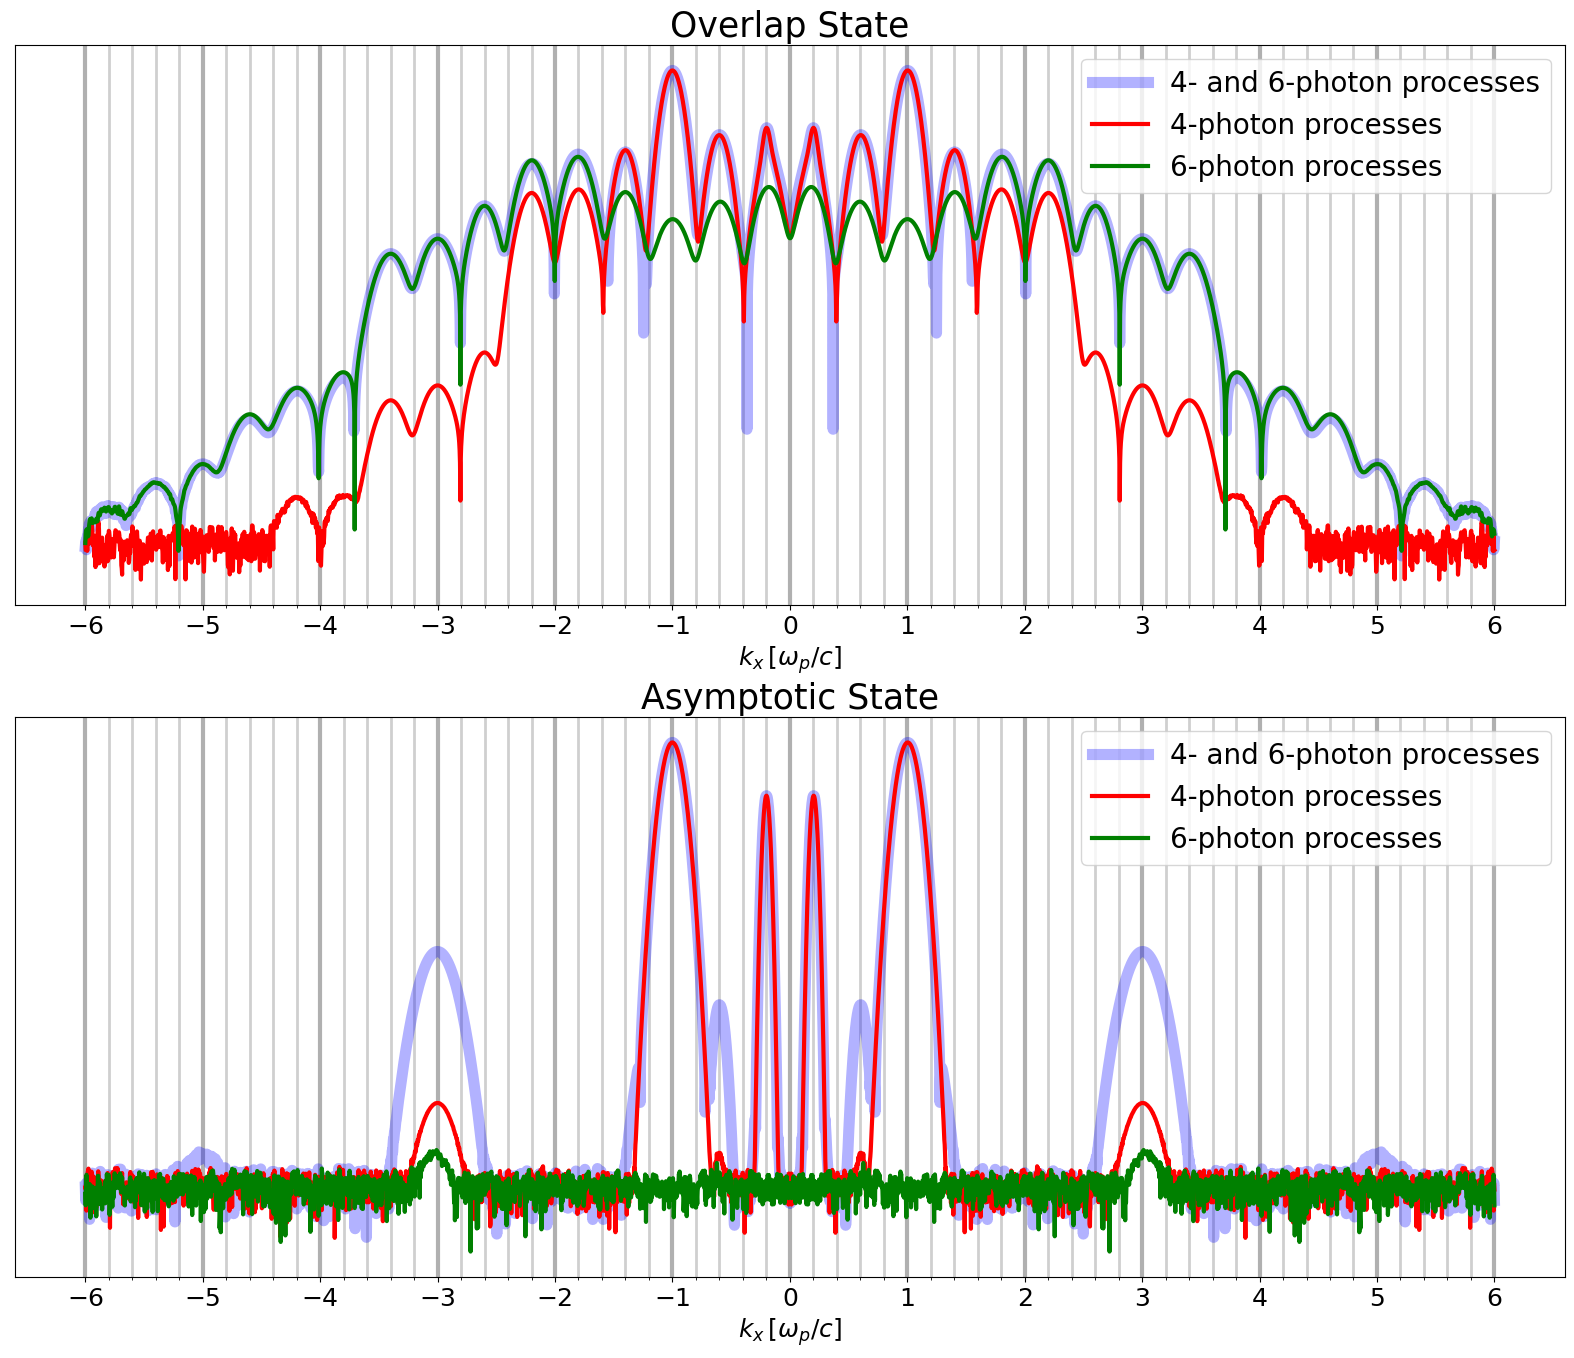

In [22]:
fft_states_nonlin = []
fft_states_only4 = []
fft_states_only6 = []

fig = plt.figure(figsize=(20, 16))

for i in range(2):
    fft_states_nonlin.append(fft(np.subtract(ez[i], ez_lin[i])))
    fft_states_nonlin[i] = np.roll(fft_states_nonlin[i], int(len(ez[i])/2))
    fft_states_nonlin[i] = np.abs(fft_states_nonlin[i])
    
    fft_states_only4.append(fft(np.subtract(ez_only4[i], ez_lin[i])))
    fft_states_only4[i] = np.roll(fft_states_only4[i], int(len(ez[i])/2))
    fft_states_only4[i] = np.abs(fft_states_only4[i])

    fft_states_only6.append(fft(np.subtract(ez_only6[i], ez_lin[i])))
    fft_states_only6[i] = np.roll(fft_states_only6[i], int(len(ez[i])/2))
    fft_states_only6[i] = np.abs(fft_states_only6[i])

    ax = fig.add_subplot(2, 1, i+1)
    if(i == 0):
        ax.set_title("Overlap State", fontsize=25)
    if(i == 1):
        ax.set_title("Asymptotic State", fontsize=25)
        
    ax.set_yscale("log")
    xs = np.linspace(-6, 6, 3600)
    ax.plot(xs, fft_states_nonlin[i][4200:7800], lw=8, c="blue", alpha=0.3, label="4- and 6-photon processes")
    ax.plot(xs, fft_states_only4[i][4200:7800], lw=3, c="red", label="4-photon processes")
    ax.plot(xs, fft_states_only6[i][4200:7800], lw=3, c="green", label="6-photon processes")
    
    xticks = np.linspace(-6, 6, 13)
    minor_xticks = np.linspace(-6, 6, 61)

    ax.set_xticks(xticks)
    ax.set_xticks(minor_xticks, minor=True)

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='x', which='minor', labelsize=12)

    ax.grid(axis="x", which='minor', linewidth = 2, alpha=0.6)
    ax.grid(axis="x", which='major', linewidth = 3)

    ax.set_yticks([])
    ax.set_xlabel("$k_x \, [\omega_p/c]$", size=18)
    
    ax.legend(fontsize=20)
    
plt.show()

The final state shows a very interesting result for the third harmonics of each probe and pump.
The combined contribution of 4- and 6-photon interactions is larger than the sum of the individual contributions.
Supposedly there is some interference going on.